In [1]:
%matplotlib inline

In [2]:
# Add the util directory to the path
import sys
import os
sys.path.append(os.path.abspath('../util'))

In [24]:
from operator import itemgetter
from itertools import islice

from nltk.corpus import reuters as re
from matplotlib import pyplot as plt

import clustering as cl
import util

In [4]:
categories = re.categories()
fileids = re.fileids()
cat_dist = []
for article in fileids:
    cat_dist.append(re.categories(article))

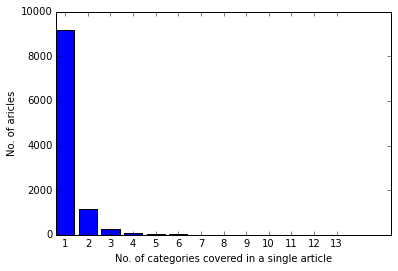

In [18]:
cat_dist_count = [len(categories) for categories in cat_dist]
distribution = list(zip(*util.distribution(cat_dist_count, pairs=True)))

plt.figure()
plt.xticks(range(len(distribution[1])))
plt.xlabel('No. of categories covered in a single article')
plt.ylabel('No. of aricles')
plt.bar(distribution[0], distribution[1], align='center')
plt.show()

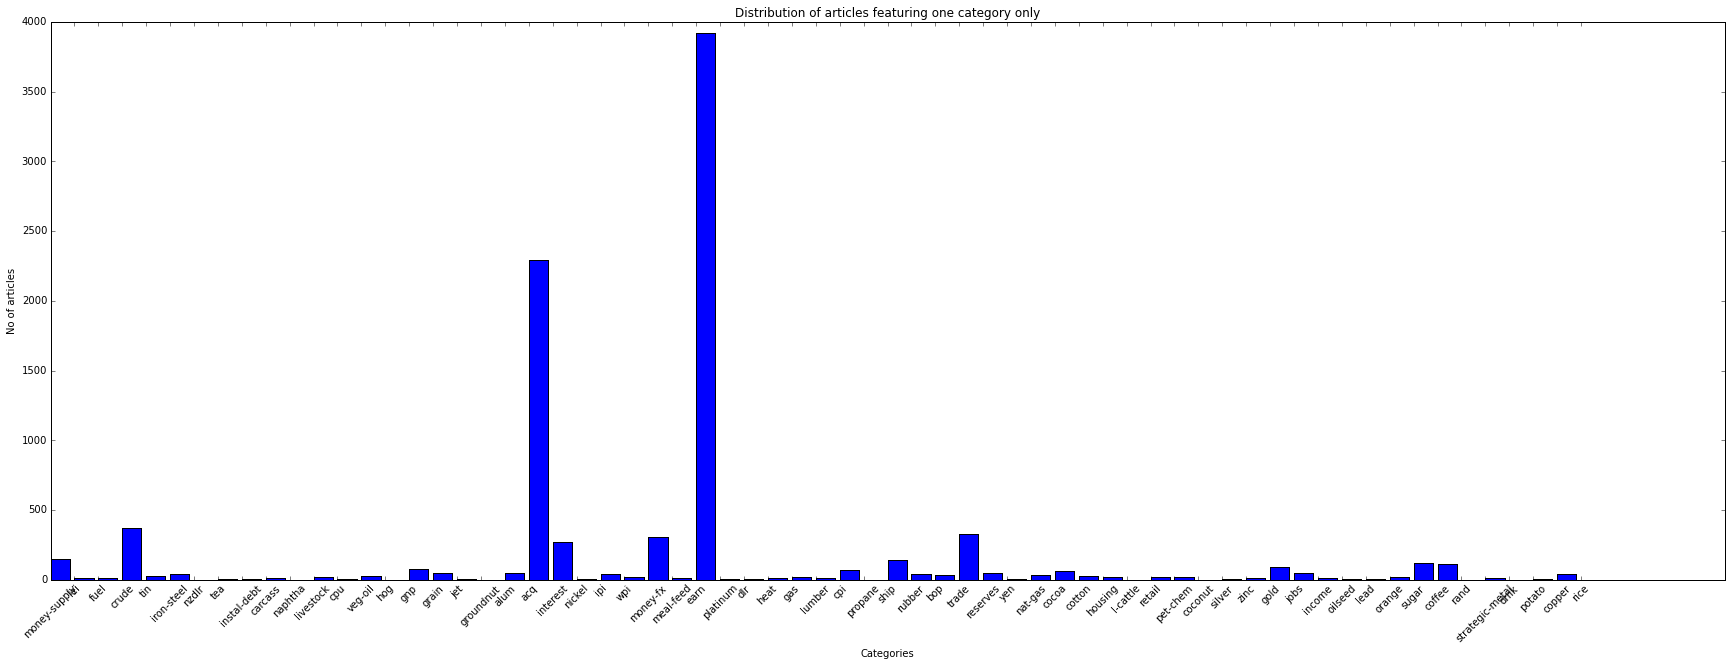

In [42]:
single_categories = [(id, re.categories(id)[0]) for id in fileids if len(re.categories(id)) == 1]
single_cat_list = util.distribution(single_categories, keyfun=itemgetter(1), pairs=True)

baseline = range(len(single_cat_list))
counts = [pair[1] for pair in single_cat_list]
categories = [pair[0] for pair in single_cat_list]

plt.figure(figsize=(30,10), dpi=100)

plt.title('Distribution of articles featuring one category only')
plt.xlabel('Categories')
plt.ylabel('No of articles')
plt.xticks(rotation=45)

plt.bar(baseline, counts)
plt.xticks(baseline, categories)
plt.show()

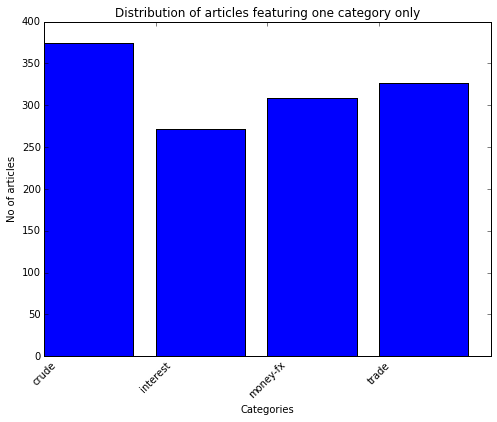

In [47]:
#single_categories = ((id, re.categories(id)[0]) for id in fileids if len(re.categories(id)) == 1)
single_cat_list = util.distribution(single_categories, keyfun=itemgetter(1), pairs=True)

single_cat_list = [x for x in single_cat_list if x[1] < 600 and x[1] > 200]

baseline = range(len(single_cat_list))
counts = [pair[1] for pair in single_cat_list]
categories = [pair[0] for pair in single_cat_list]

plt.figure(figsize=(8,6), dpi=100)

plt.title('Distribution of articles featuring one category only')
plt.xlabel('Categories')
plt.ylabel('No of articles')
plt.xticks(rotation=45)

plt.bar(baseline, counts)
plt.xticks(baseline, categories)
plt.show()

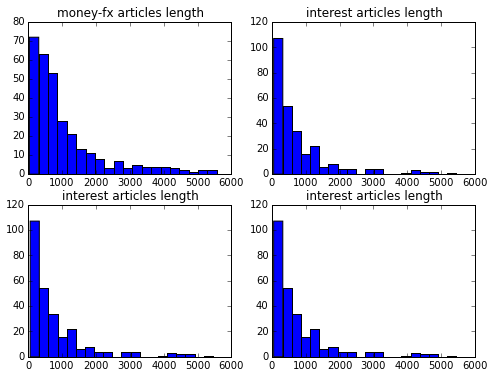

In [61]:
topic_list = [pair for pair in single_categories if pair[1] in dict(single_cat_list).keys()]
topics = util.group(topic_list, itemgetter(1))
for topic in topics:
    topics[topic] = list(map(itemgetter(0), topics[topic]))
    
topics_len = {}
for topic in topics:
    topics_len[topic] = list(map(lambda fileid: len(re.raw(fileid)), topics[topic]))

keys = list(topics_len.keys())
plt.figure(figsize=(8,6), dpi=100)

plt.subplot(221)
plt.title(keys[0] + ' articles length')
plt.hist(topics_len[keys[0]], bins=20)

plt.subplot(222)
plt.title(keys[1] + ' articles length')
plt.hist(topics_len[keys[1]], bins=20)

plt.subplot(223)
plt.title(keys[1] + ' articles length')
plt.hist(topics_len[keys[1]], bins=20)

plt.subplot(224)
plt.title(keys[1] + ' articles length')
plt.hist(topics_len[keys[1]], bins=20)

plt.show()